<a href="https://colab.research.google.com/github/Rodriggo1987/Ciencia_de_Dados/blob/master/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 - Necessidade de construção de um modelo para a conversão de temperaturas entre as escalas Celsius e Fahrenheit.**

---
Equação para conversão: T(F°) = T(C°) x 9/5 + 32



1 - Importando Bibliotecas


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [82]:
import tensorflow as tf


2 - Importando Dados

In [97]:
temperature_df = pd.read_excel('/content/Celsius_Tensorflow.xlsx')
temperature_df.reset_index(drop = True, inplace=True)
#  FORMULA DE CONVERSÃO NO EXCEL -   =CONVERTER(LC[-1];"C";"F")

In [ ]:
temperature_df

In [ ]:
temperature_df.head()  # 5 primeiros valores

In [ ]:
temperature_df.tail(10) # 10  Ultimos valores

In [ ]:
temperature_df.info() #Tipos

In [ ]:
temperature_df.describe() #Medias do valores

3 - Valores Gráficos


<Axes: xlabel='Celsius ', ylabel='Fahrenheit'>

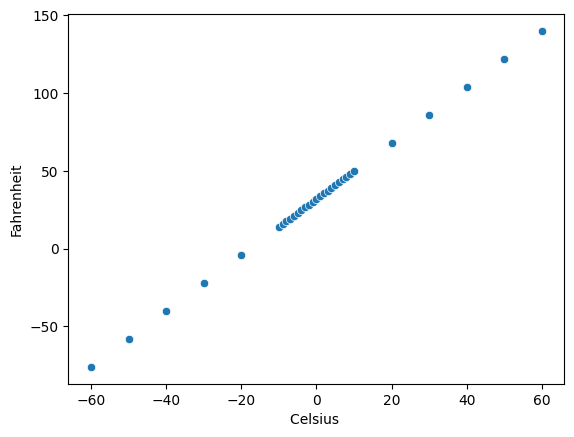

In [98]:
sns.scatterplot(x=temperature_df['Celsius '], y=temperature_df['Fahrenheit'])

4 - Configuração da Base de Dados

In [99]:
x_train = temperature_df['Celsius ']
y_train =  temperature_df['Fahrenheit']

In [101]:
x_train.shape      #Valor Total de Dados

(31,)

In [88]:
y_train.shape    #Valor Total de Dados

(31,)

5 - Configuração e treinamento do Modelo

In [100]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 1, input_shape = [1]))  #Usnado Keras do TensorFlow
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.05), loss = 'mean_squared_error')  # Erro quadrado medio / Otimização de 0.05 ascendente.

In [108]:
epochs_hist = model.fit(x_train, y_train, epochs= 1280) #Modelo em 200 epocas, gerando media de erro.

Epoch 1/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.3681
Epoch 2/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.3563
Epoch 3/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.3446
Epoch 4/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.3330
Epoch 5/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.3215
Epoch 6/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.3100
Epoch 7/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.2987
Epoch 8/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.2875
Epoch 9/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.2763
Epoch 10/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.2652
Epoch 11/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.2542
Epoch 12/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.2433
Epoch 13/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.2325
Epoch 14/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.2218
Epoch 15/1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.2112
Epoc

In [92]:
epochs_hist.history.keys()

dict_keys(['loss'])

6 - Avaliação do Modelo

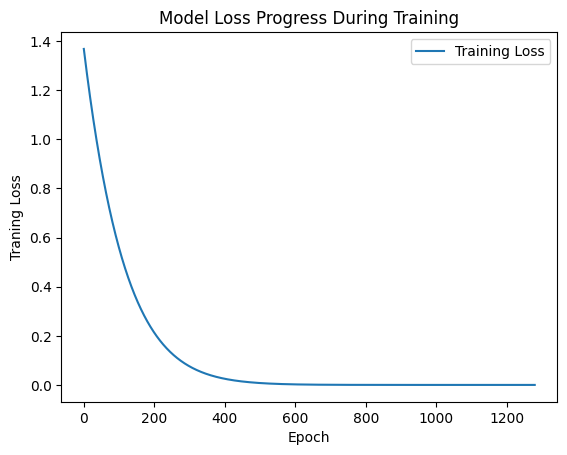

In [109]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Traning Loss')
plt.legend(['Training Loss'])

In [110]:
model.get_weights()   # Resultado da Equação.  Valor consta a ser bsucado de 32

[array([[1.8]], dtype=float32), array([31.999804], dtype=float32)]

In [111]:
temp_c = 34
temp_f = model.predict(np.array([[temp_c]], dtype=float))   # Valor Obitido através das Epocas
temp_f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[93.1998]], dtype=float32)

In [112]:
temp_f1 = 9/5 * temp_c + 32   # Valor Ideal
temp_f1

93.2